In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
aoti = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
print(aoti.dtypes)
print(aoti.shape)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object
(35064, 18)


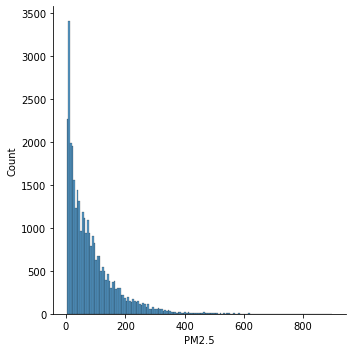

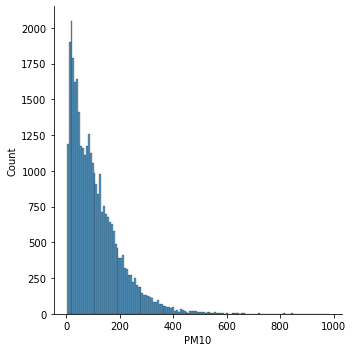

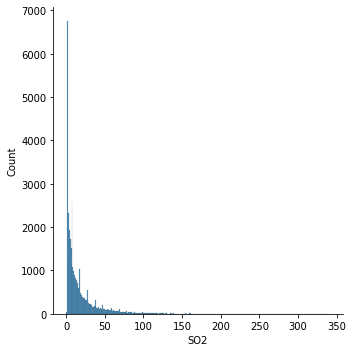

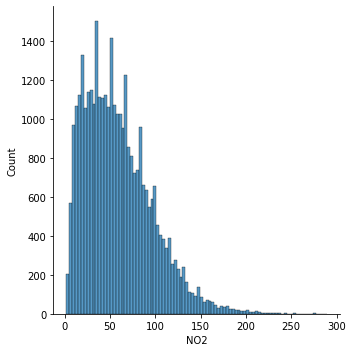

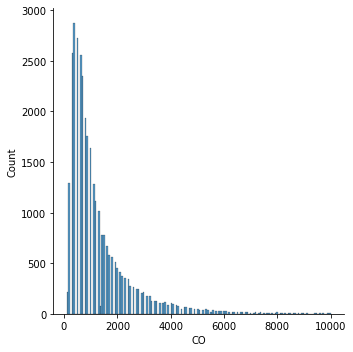

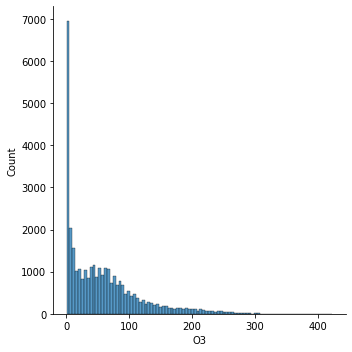

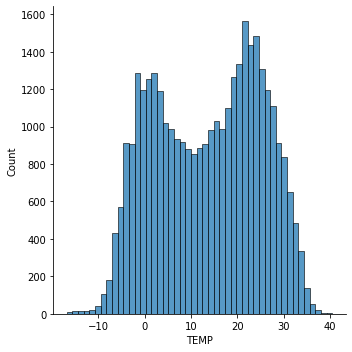

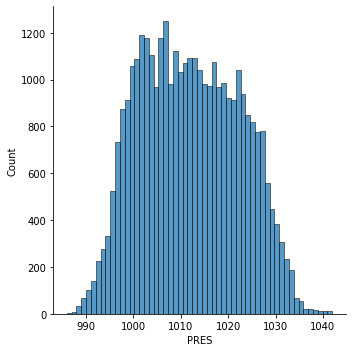

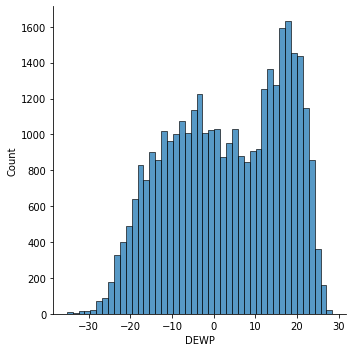

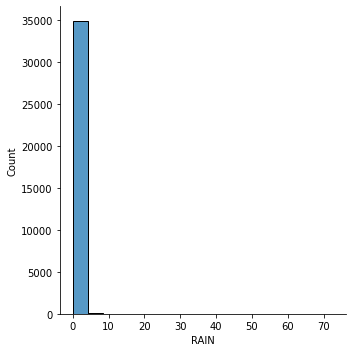

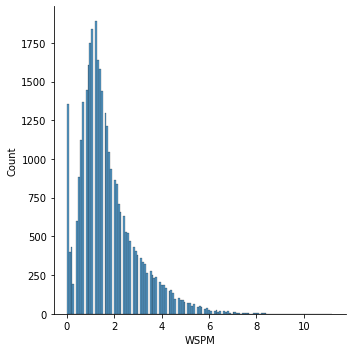

In [3]:
sns.displot(aoti["PM2.5"])
plt.show()
sns.displot(aoti["PM10"])
plt.show()
sns.displot(aoti["SO2"])
plt.show()
sns.displot(aoti["NO2"])
plt.show()
sns.displot(aoti["CO"])
plt.show()
sns.displot(aoti["O3"])
plt.show()
sns.displot(aoti["TEMP"])
plt.show()
sns.displot(aoti["PRES"])
plt.show()
sns.displot(aoti["DEWP"])
plt.show()
sns.displot(aoti["RAIN"])
plt.show()
sns.displot(aoti["WSPM"])
plt.show()

In [4]:
lack = aoti.isnull()
lack_col = lack.any()
print(lack.sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


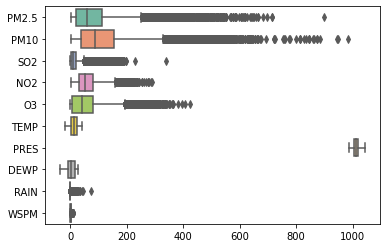

In [5]:
out_1 = aoti[['PM2.5','PM10','SO2','NO2','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
ax_1 = sns.boxplot(data=out_1, orient="h", palette="Set2")

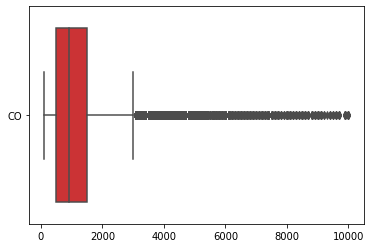

In [6]:
out_2 = aoti[['CO']]
ax_2 = sns.boxplot(data=out_2, orient="h", palette="Set1")

In [7]:
aoti = aoti.drop(["TEMP","PRES","DEWP","RAIN","wd","WSPM","station"],axis=1)
print(aoti.dtypes)
print(aoti.shape)

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
dtype: object
(35064, 11)


In [8]:
aoti = aoti.dropna()
print(aoti.dtypes)
print(aoti.shape)

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
dtype: object
(31896, 11)


In [9]:
null = aoti.isnull()
print(null.sum())

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64


In [10]:
Q1 = aoti.quantile(0.25)
Q3 = aoti.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

No       17211.5
year         2.0
month        6.0
day         15.0
hour        12.0
PM2.5       92.0
PM10       117.0
SO2         18.0
NO2         52.0
CO        1000.0
O3          74.0
dtype: float64


In [11]:
print(aoti[aoti['PM2.5'] < (Q1['PM2.5'] - 1.5 * IQR['PM2.5'])])
print(aoti[aoti['PM2.5'] > (Q3['PM2.5'] + 1.5 * IQR['PM2.5'])])

print(aoti[aoti['PM10'] < (Q1['PM10'] - 1.5 * IQR['PM10'])])
print(aoti[aoti['PM10'] > (Q3['PM10'] + 1.5 * IQR['PM10'])])

print(aoti[aoti['SO2'] < (Q1['SO2'] - 1.5 * IQR['SO2'])])
print(aoti[aoti['SO2'] > (Q3['SO2'] + 1.5 * IQR['SO2'])])

print(aoti[aoti['NO2'] < (Q1['NO2'] - 1.5 * IQR['NO2'])])
print(aoti[aoti['NO2'] > (Q3['NO2'] + 1.5 * IQR['NO2'])])

print(aoti[aoti['CO'] < (Q1['CO'] - 1.5 * IQR['CO'])])
print(aoti[aoti['CO'] > (Q3['CO'] + 1.5 * IQR['CO'])])

print(aoti[aoti['O3'] < (Q1['O3'] - 1.5 * IQR['O3'])])
print(aoti[aoti['O3'] > (Q3['O3'] + 1.5 * IQR['O3'])])

Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3]
Index: []
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO    O3
120      121  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0  28.0
121      122  2013      3    6     1  272.0  300.0  131.0  166.0  4000.0  22.0
140      141  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0  17.0
141      142  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0  17.0
142      143  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0  17.0
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   ...
34755  34756  2017      2   16     3  277.0  277.0   55.0  150.0  4100.0  64.0
34756  34757  2017      2   16     4  284.0  284.0   49.0  146.0  4000.0  64.0
34757  34758  2017      2   16     5  275.0  275.0   46.0  129.0  3700.0  64.0
34758  34759  2017      2   16     6  270.0  270.0   47.0  136.0  3700.0  64.0
34759  34760  2017      2   16     7

In [12]:
aoti = aoti[aoti['PM2.5'] <= (Q3['PM2.5'] + 1.5 * IQR['PM2.5'])]
aoti = aoti[aoti['PM10'] <= (Q3['PM10'] + 1.5 * IQR['PM10'])]
aoti = aoti[aoti['SO2'] <= (Q3['SO2'] + 1.5 * IQR['SO2'])]
aoti = aoti[aoti['NO2'] <= (Q3['NO2'] + 1.5 * IQR['NO2'])]
aoti = aoti[aoti['CO'] <= (Q3['CO'] + 1.5 * IQR['CO'])]
aoti = aoti[aoti['O3'] <= (Q3['O3'] + 1.5 * IQR['O3'])]

print(aoti.dtypes)
print(aoti.shape)

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
dtype: object
(25773, 11)


In [13]:
for index in aoti.index:
    if aoti.loc[index, 'PM2.5'] <= 35:
        aoti.loc[index, 'PM2.5_lv'] = 0
    elif aoti.loc[index, 'PM2.5'] > 35:
        aoti.loc[index, 'PM2.5_lv'] = 1
    if aoti.loc[index, 'PM10'] <= 80:
        aoti.loc[index, 'PM10_lv'] = 0
    elif aoti.loc[index, 'PM10'] > 80:
        aoti.loc[index, 'PM10_lv'] = 1
    if aoti.loc[index, 'SO2'] <= 30:
        aoti.loc[index, 'SO2_lv'] = 0
    elif aoti.loc[index, 'SO2'] > 30:
        aoti.loc[index, 'SO2_lv'] = 1
    if aoti.loc[index, 'NO2'] <= 60:
        aoti.loc[index, 'NO2_lv'] = 0
    elif aoti.loc[index, 'NO2'] > 60:
        aoti.loc[index, 'NO2_lv'] = 1
    if aoti.loc[index, 'CO'] <= 800:
        aoti.loc[index, 'CO_lv'] = 0
    elif aoti.loc[index, 'CO'] > 800:
        aoti.loc[index, 'CO_lv'] = 1
    if aoti.loc[index, 'O3'] <= 55:
        aoti.loc[index, 'O3_lv'] = 0
    elif aoti.loc[index, 'O3'] > 55:
        aoti.loc[index, 'O3_lv'] = 1
        
print(aoti.dtypes)
print(aoti.shape)

No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
PM2.5_lv    float64
PM10_lv     float64
SO2_lv      float64
NO2_lv      float64
CO_lv       float64
O3_lv       float64
dtype: object
(25773, 17)


In [14]:
aoti.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,PM2.5_lv,PM10_lv,SO2_lv,NO2_lv,CO_lv,O3_lv
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
aoti_time = aoti[['No','year','month','day','hour']]
print(aoti_time.dtypes)

aoti_pollutant = aoti[['No','PM2.5','PM10','SO2','NO2','CO','O3']]
print(aoti_pollutant.dtypes)

aoti_file = pd.concat([aoti_time,aoti_pollutant],axis=1)
print(aoti_file.dtypes)

No       int64
year     int64
month    int64
day      int64
hour     int64
dtype: object
No         int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
dtype: object
No         int64
year       int64
month      int64
day        int64
hour       int64
No         int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
dtype: object


In [16]:
aoti_sortfile = aoti.sort_values(['year','month','day','hour'])
aoti_sortfile.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,PM2.5_lv,PM10_lv,SO2_lv,NO2_lv,CO_lv,O3_lv
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
print(aoti_sortfile.corr()['PM2.5'])

No         -0.080980
year       -0.089024
month       0.040360
day         0.036752
hour       -0.030531
PM2.5       1.000000
PM10        0.833480
SO2         0.332618
NO2         0.564950
CO          0.709371
O3         -0.096690
PM2.5_lv    0.721523
PM10_lv     0.706298
SO2_lv      0.232012
NO2_lv      0.450224
CO_lv       0.649379
O3_lv      -0.137561
Name: PM2.5, dtype: float64


In [18]:
aoti_sortfile = aoti_sortfile.drop(['month','day','hour'],axis=1)
print(aoti_sortfile.dtypes)
print(aoti_sortfile.shape)

No            int64
year          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
PM2.5_lv    float64
PM10_lv     float64
SO2_lv      float64
NO2_lv      float64
CO_lv       float64
O3_lv       float64
dtype: object
(25773, 14)


Counter({1.0: 14447, 0.0: 11326})


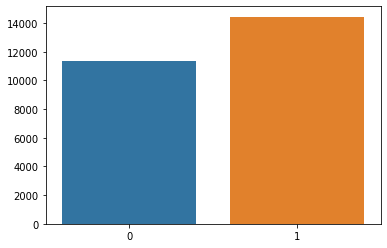

In [19]:
print(Counter(aoti_sortfile['PM2.5_lv']))

sns.barplot(x=[0,1], y=[Counter(aoti_sortfile['PM2.5_lv'])[0],Counter(aoti_sortfile['PM2.5_lv'])[1]])
plt.show()

Counter({0.0: 14447, 1.0: 14447})


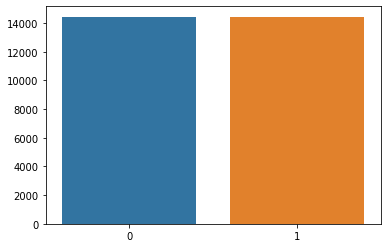

In [20]:
smo = SMOTE(random_state=42)
aoti_smo, y_smo = smo.fit_resample(aoti_sortfile, aoti_sortfile['PM2.5_lv'])
print(Counter(y_smo))

sns.barplot(x=[0,1], y=[Counter(y_smo)[0],Counter(y_smo)[1]])
plt.show()

In [21]:
aoti_smo.to_csv('aoti_processed_file.csv', index=False)